# Python Homework 4

**Release date:** Sunday, May 24<br>
**Due date:** Friday, June 5, at midnight via <font color="blue">Gradescope</font> 

**Instruction:** Please upload your jupyter notebook on <font color="blue">Gradescope</font> with filename __PythonHW4_YOURPERMNUMBER.ipynb__.


__Background__: Let $(B_t)_{t\geq 0}$ denote a standard Brownian motion. A so-called __stochastic differential equation (SDE)__ is an equation of the form

\begin{equation}
    dX_t = b(X_t) \, dt + \sigma(X_t) \, dB_t, \quad X_0 = x,
\end{equation}
  
with starting value $x \in \mathbb{R}$ and two (deterministic) functions $b: \mathbb{R} \rightarrow \mathbb{R}$, $\sigma: \mathbb{R} \rightarrow \mathbb{R}$ which are given.
  
The "differential form" in above SDE is just a shorthand notation. More precisely, solving the SDE means to find a stochastic process $(X_t)_{t \geq 0}$ which satisfies the __integral equation__

\begin{equation}
    X_t = x + \int_0^t b(X_s) \, ds + \int_0^t \sigma(X_s) \, dB_s \quad (t \geq 0).
\end{equation}

Note that the process $(X_t)_{t \geq 0}$ appears on both sides of this equation. The first term 

\begin{equation}
    \int_0^t b(X_s) \, ds \quad (t \geq 0)
\end{equation}

can be thought of as just integrating the (random) function $s \mapsto b(X_s)$ over the interval $[0,t]$. However, the second term

\begin{equation}
    \int_0^t \sigma(X_s) \, dB_s \quad (t \geq 0)
\end{equation}

is called a __stochastic integral__ of the (random) function $s \mapsto \sigma(X_s)$ with respect to Brownian motion $(B_s)_{0 \leq s \leq t}$ over the interval $[0,t]$. Of course, one has to make sense of this and we will discuss this a bit in Chapter 5 "Introduction to Stochastic Calculus" in Week 10.


__Numerical Approximation of an SDE (Euler-Maruyama Method):__

The differential form of a stochastic differential equation lends itself to an intuitive method for simulating the solution process $(X_t)_{t\geq 0}$. Given the SDE

\begin{equation}
    dX_t = b(X_t) \, dt + \sigma(X_t) \, dB_t, \quad X_0 = x,
\end{equation}

the *Euler-Maruyama* method generates a discrete sequence $X_0, X_1, \ldots, X_n$, which approximates the process $(X_t)_{0 \leq t\leq T}$ on an interval $[0,T]$.

The idea is to partition the interval $[0,T]$ into $n$ equally spaced points

\begin{equation}
    0 = t_0 < t_1 < t_2 < \cdots < t_{n-1} < t_n = T
\end{equation}

where $t_i = i \cdot T/n$ for $i=0,1,\ldots,n$, and to *discretize* the SDE via

\begin{equation}
    X_{t_0} = x, \quad X_{t_{i+1}} = X_{t_i} + b(X_{t_i}) \cdot (t_{i+1} - t_{i}) + \sigma(X_{t_i}) \cdot (B_{t_{i+1}} - B_{t_{i}}) \quad (i=0,1,\ldots,n-1).
\end{equation}

Note that in the SDE the differential $dX_{t_{i+1}}$ is approximated by $X_{t_{i+1}}-X_{t_i}$, $dt_{i+1}$ is approximated by $t_{i+1} - t_i$ and the stochastic differential $dB_{t_{i+1}}$ is approximated by the increment of the Brownian motion $B_{t_{i+1}} - B_{t_{i}}$. 

Above scheme defines recursively a sequence $X_{t_0}, X_{t_1},\ldots,X_{t_n}$ which gives a *discretized approximate sample path* for $(X_t)_{0 \leq t\leq T}$. If $n$ is very large the approximation will be sufficiently good.


Load some packages:

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Problem 1 (20 Points)

1. Simulate the solution $(X_t)_{0 \leq t \leq T}$ of the SDE

\begin{equation}
    dX_t = -r \cdot (X_t - \mu) \, dt + \sigma \, dB_t \quad (0 \leq t \leq T), \quad X_0 = 1,
\end{equation}

by using the Euler-Maruyama method. Choose $r=0.5$, $\mu=-1$, $\sigma = 0.1$, $T=10$ and $n = 1000$. 

In [129]:
X0 = 1
r = 0.5
Mu = -1
Sigma = 0.1
T = 10
n = 1000
dt = 1/n 

t = np.arange(0,1, dt);
d = np.sqrt(dt)*np.random.randn(n);
D = np.cumsum(d);

Xtrue = X0*np.exp(((Mu - 0.5*Sigma**2)*t[1:])+(Sigma*D[:-1])) 


Dt = r*dt
N = int(n/r) 
Xem = np.zeros(N)
Xt = X0;


for i in range(N):
    x = int(r*(i-1))
    y = int(r*i)
    Xt = Xt + Dt*Mu*Xt + Sigma*Xt*np.sum(d[x:y]);
    Xem[i] = Xt

sde = np.abs(Xem[-1]-Xtrue[-1]) -1
print(sde)


-0.9992757584963069


2. Use your code from 1.) to plot a discretized approximate sample path (realization) of $(X_t)_{0 \leq t \leq 10}$ on $[0,10]$.

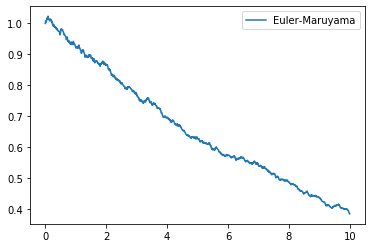

In [133]:
EM = plt.plot(np.arange(0.0, 10, r*(T/n)), Xem, label="Euler-Maruyama")
plt.legend(handles=EM);


3. Approximate the mean $\mathbb{E}[X_{10}]$ of $X_{10}$ by running 10000 simulations with your code from 1.)

In [140]:
def SDE(X0, r, Mu, Sigma, n):
    dt = 1/n 
    
    t = np.arange(0.0,1, dt);
    d = np.sqrt(dt)*np.random.randn(n);
    D = np.cumsum(d);
    
    Xtrue = X0*np.exp(((Mu - 0.5*Sigma**2)*t[1:])+(Sigma*D[:-1])) 
    
    Dt = r*dt
    N = int(n/r) 
    Xem = np.zeros(N)
    Xt = X0;
     
    for i in range(N):
        x = int(r*(i-1))
        y = int(r*i)
        Xt = Xt + Dt*Mu*Xt + Sigma*Xt*np.sum(d[x:y]);
        Xem[i] = Xt
    
    sde = np.abs(Xem[-1]-Xtrue[-1]) -1
    return sde

count = []
for i in range(10000):
    x = SDE(1, 0.5, -1, 0.1, 1000)
    count.append(x)
import statistics
statistics.mean(count)


-0.98653782827484
